In [20]:
# Load and explore the wine dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define the specific columns we want to load
selected_columns = [
    'wine_ratings_count', 'wine_ratings_average', 'wine_name', 'wine_type_id',
    'region_name', 'country_name', 'winery_name', 'acidity', 'intensity', 
    'sweetness', 'tannin'
]

# Load the consolidated wine data with only selected columns
df = pd.read_excel('data/all_wines.xlsx', usecols=selected_columns)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Total wines: {len(df):,}")
print(f"Columns loaded: {list(df.columns)}")

Dataset loaded successfully!
Dataset shape: (2021, 11)
Total wines: 2,021
Columns loaded: ['wine_ratings_count', 'wine_ratings_average', 'wine_name', 'wine_type_id', 'region_name', 'country_name', 'winery_name', 'acidity', 'intensity', 'sweetness', 'tannin']


In [21]:
# Standardize region names by replacing similar/related regions
print("Standardizing region names...")
print(f"Before standardization - Unique regions: {df['region_name'].nunique()}")

# Replace region name variations with their main region names
df['region_name'] = df['region_name'].replace({
    'Alentejano': 'Alentejo',
    'Duriense': 'Douro'
})

print(f"After standardization - Unique regions: {df['region_name'].nunique()}")
print("Region name standardization completed.")

Standardizing region names...
Before standardization - Unique regions: 205
After standardization - Unique regions: 203
Region name standardization completed.


In [22]:
# Wine type ID mapping
# Each wine in the dataset has a wine_type_id that corresponds to different wine categories
# This mapping helps us understand what each ID represents in the data
wine_type_map = {
    1: 'Red',
    2: 'White', 
    3: 'Sparkling',
    4: 'Rosé',
    7: 'Dessert',
    24: 'Fortified'
}

# Display the wine type distribution in our dataset
print("Wine Type Distribution:")
wine_type_counts = df['wine_type_id'].value_counts().sort_index()
for type_id, count in wine_type_counts.items():
    wine_type_name = wine_type_map.get(type_id, f'Unknown (ID: {type_id})')
    percentage = (count / len(df)) * 100
    print(f"  {wine_type_name} (ID {type_id}): {count:,} wines ({percentage:.1f}%)")

Wine Type Distribution:
  Red (ID 1): 852 wines (42.2%)
  White (ID 2): 776 wines (38.4%)
  Sparkling (ID 3): 129 wines (6.4%)
  Rosé (ID 4): 168 wines (8.3%)
  Dessert (ID 7): 8 wines (0.4%)
  Fortified (ID 24): 88 wines (4.4%)


In [23]:
# Filter for Portuguese red wines from Douro and Alentejo regions and get top 50 by ratings count
# Apply filters: Portugal + Red wines (wine_type_id = 1) + Douro/Alentejo regions only
portuguese_red_wines = df[
    (df['country_name'] == 'Portugal') & 
    (df['wine_type_id'] == 1) &
    (df['region_name'].isin(['Douro', 'Alentejo']))
].copy()

# Remove duplicate rows to ensure unique wines only
print(f"Portuguese red wines from Douro and Alentejo before removing duplicates: {len(portuguese_red_wines):,}")
portuguese_red_wines_unique = portuguese_red_wines.drop_duplicates()
print(f"Portuguese red wines from Douro and Alentejo after removing duplicates: {len(portuguese_red_wines_unique):,}")
print(f"Duplicates removed: {len(portuguese_red_wines) - len(portuguese_red_wines_unique):,}")

# Show regional distribution
region_counts = portuguese_red_wines_unique['region_name'].value_counts()
print(f"\nRegional distribution:")
for region, count in region_counts.items():
    percentage = (count / len(portuguese_red_wines_unique)) * 100
    print(f"  {region}: {count:,} wines ({percentage:.1f}%)")

# Sort by wine_ratings_count in descending order and get top 50
top_50_portuguese_reds = portuguese_red_wines_unique.sort_values(
    'wine_ratings_count', 
    ascending=False
).head(50)

print(f"\nShowing top 50 unique Portuguese red wines from Douro and Alentejo by ratings count:\n")

# Display the top 50 wines with key information
for i, (idx, wine) in enumerate(top_50_portuguese_reds.iterrows(), 1):
    print(f"{i:2d}. {wine['wine_name']}")
    print(f"    Winery: {wine['winery_name']}")
    print(f"    Region: {wine['region_name']}")
    print(f"    Ratings: {wine['wine_ratings_count']:,} ({wine['wine_ratings_average']:.2f}/5.0)")
    
    # Show taste profile if available
    taste_info = []
    for attribute in ['acidity', 'intensity', 'sweetness', 'tannin']:
        value = wine[attribute]
        if pd.notna(value):
            taste_info.append(f"{attribute.capitalize()}: {value:.1f}")
    
    if taste_info:
        print(f"    Taste: {', '.join(taste_info)}")
    print()

Portuguese red wines from Douro and Alentejo before removing duplicates: 253
Portuguese red wines from Douro and Alentejo after removing duplicates: 245
Duplicates removed: 8

Regional distribution:
  Douro: 136 wines (55.5%)
  Alentejo: 109 wines (44.5%)

Showing top 50 unique Portuguese red wines from Douro and Alentejo by ratings count:

 1. Papa Figos Douro
    Winery: Casa Ferreirinha
    Region: Douro
    Ratings: 92,251 (3.90/5.0)
    Taste: Acidity: 3.0, Intensity: 4.3, Sweetness: 1.9, Tannin: 3.4

 2. Monte Velho Tinto
    Winery: Esporão
    Region: Alentejo
    Ratings: 77,048 (3.60/5.0)
    Taste: Acidity: 3.1, Intensity: 3.9, Sweetness: 1.9, Tannin: 3.0

 3. Esteva Douro
    Winery: Casa Ferreirinha
    Region: Douro
    Ratings: 69,013 (3.70/5.0)
    Taste: Acidity: 3.0, Intensity: 4.1, Sweetness: 1.8, Tannin: 3.4

 4. EA Tinto
    Winery: Cartuxa
    Region: Alentejo
    Ratings: 61,736 (3.70/5.0)
    Taste: Acidity: 2.9, Intensity: 3.8, Sweetness: 1.9, Tannin: 2.9

 5. 

Wines with complete taste profile data: 50 out of 50
Regions represented: 2
Regions: Douro, Alentejo



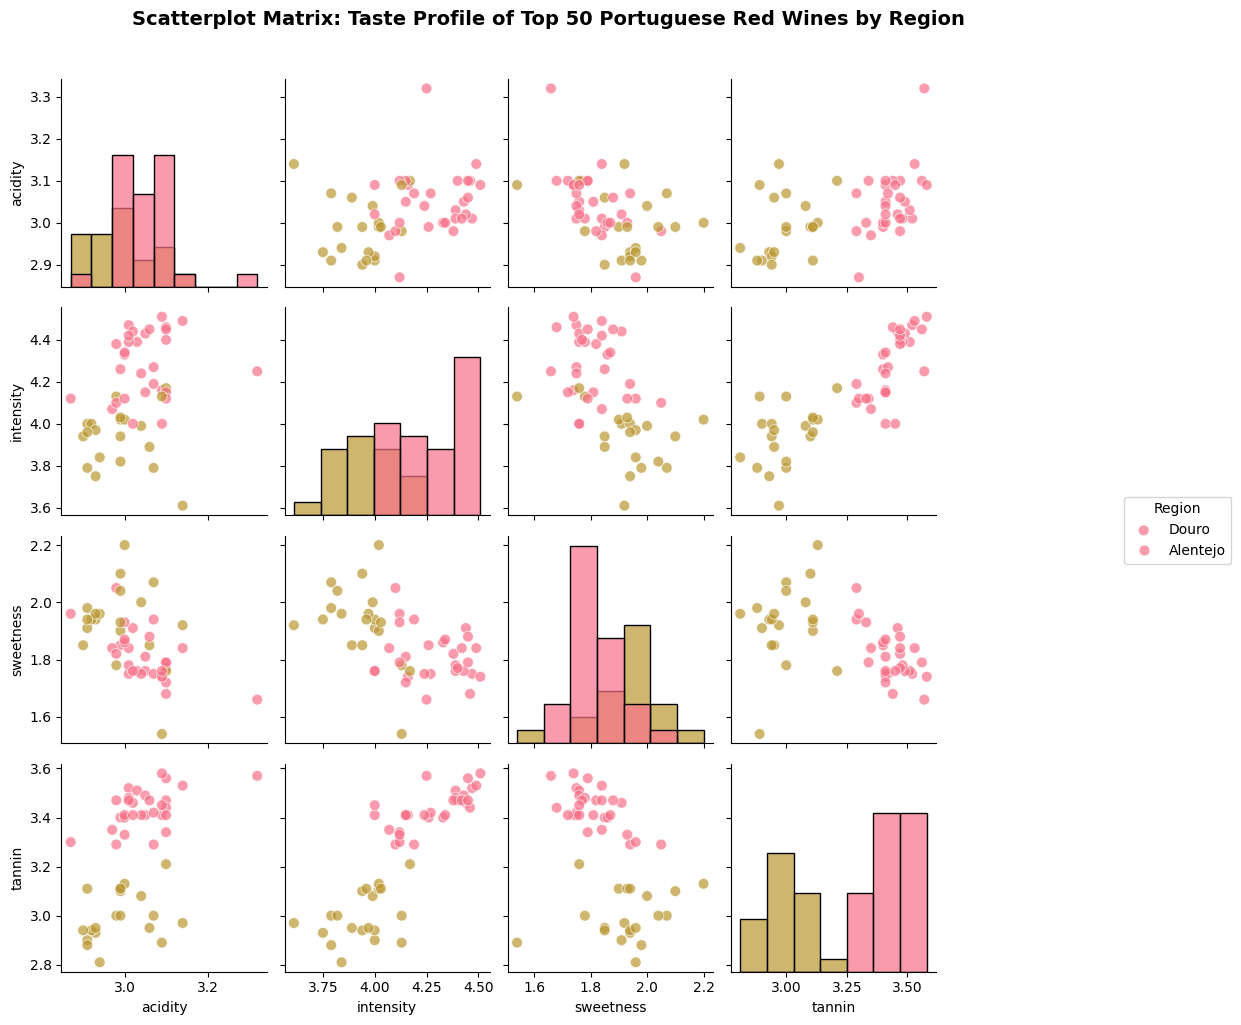

In [25]:
# Create a Scatterplot Matrix for taste profile attributes
# Filter data to only include wines with taste profile data (remove NaN values)
taste_attributes = ['acidity', 'intensity', 'sweetness', 'tannin']

# Filter the top 50 Portuguese reds to only include wines with taste data
top_50_with_taste = top_50_portuguese_reds.dropna(subset=taste_attributes)

print(f"Wines with complete taste profile data: {len(top_50_with_taste)} out of {len(top_50_portuguese_reds)}")
print(f"Regions represented: {top_50_with_taste['region_name'].nunique()}")
print(f"Regions: {', '.join(top_50_with_taste['region_name'].unique())}\n")

# Create the scatterplot matrix
g = sns.pairplot(
    data=top_50_with_taste,
    vars=taste_attributes,
    hue='region_name',
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 's': 60},
    diag_kws={'alpha': 0.7}
)

# Move legend outside the plot area
g._legend.remove()  # Remove the default legend
g.fig.legend(
    labels=top_50_with_taste['region_name'].unique(),
    title='Region',
    bbox_to_anchor=(1.02, 0.5),  # Position outside plot area
    loc='center left',
    borderaxespad=0
)

g.fig.suptitle('Scatterplot Matrix: Taste Profile of Top 50 Portuguese Red Wines by Region', 
               y=1.02, fontsize=14, fontweight='bold')

# Adjust layout to accommodate the external legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make room for the legend on the right
plt.show()

C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3201821441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3201821441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3201821441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3201821441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

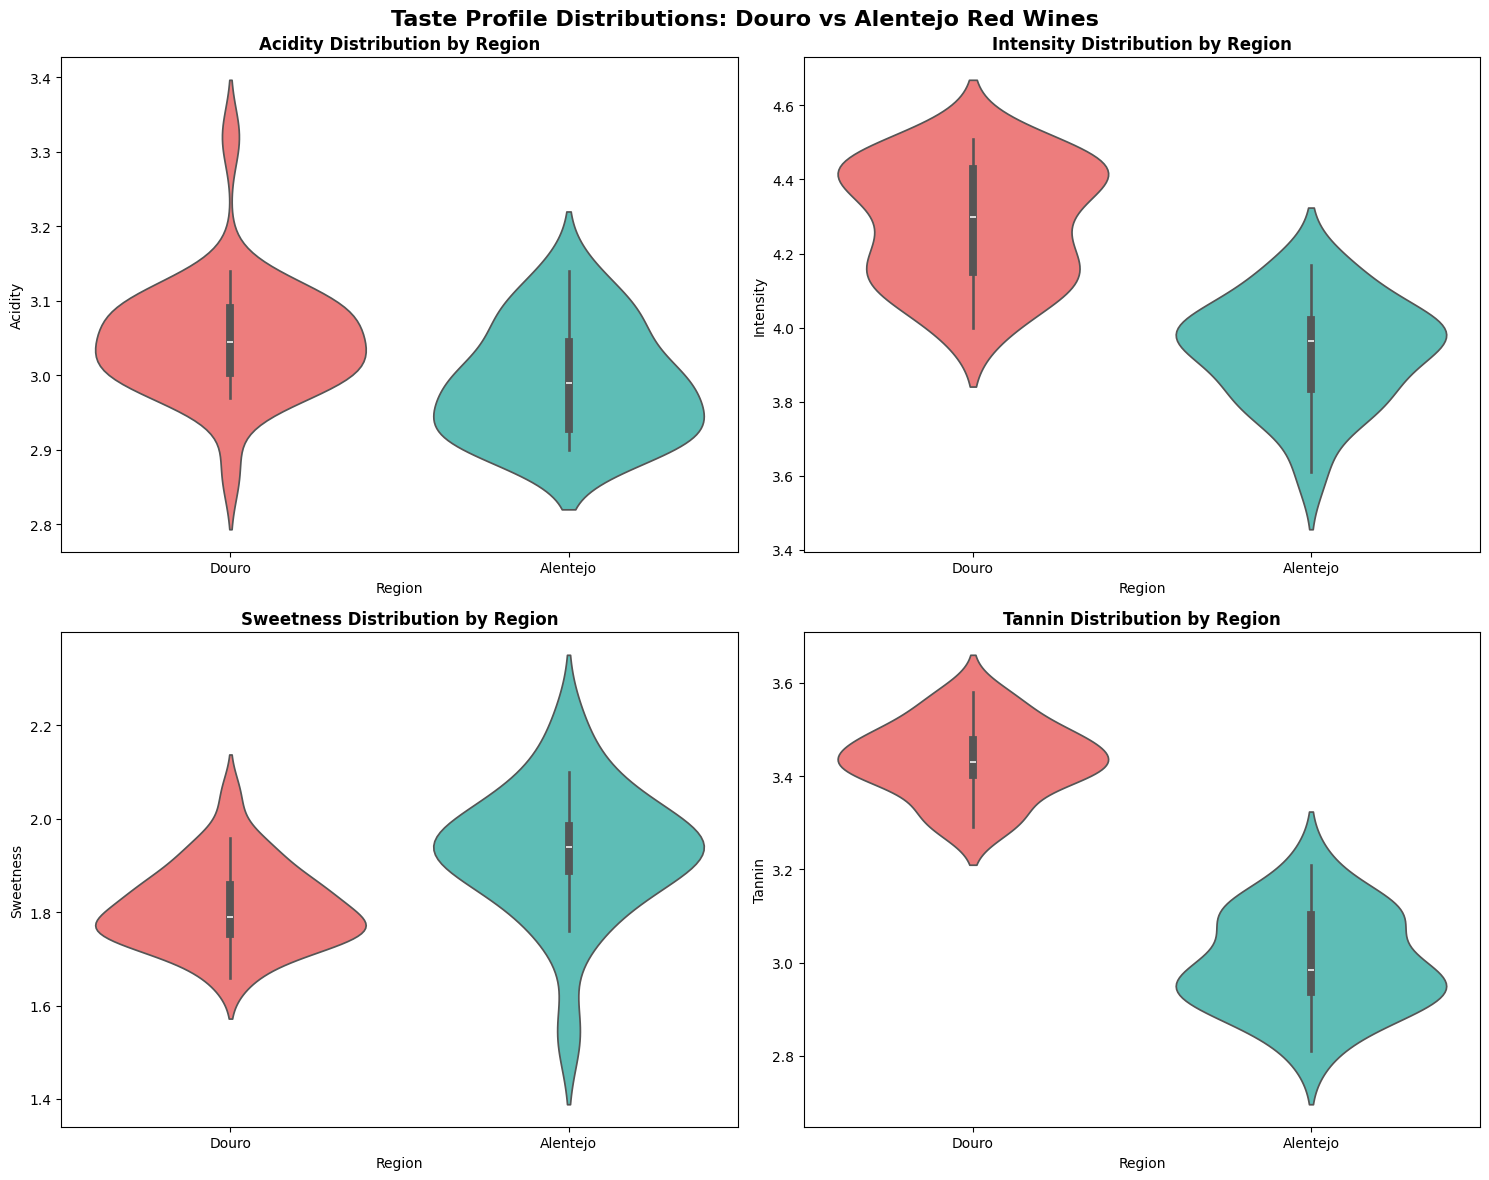

In [26]:
# Alternative Visualizations for Better Insights

# 1. VIOLIN PLOTS - Show distribution and density of taste attributes by region
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Taste Profile Distributions: Douro vs Alentejo Red Wines', fontsize=16, fontweight='bold')

for i, attribute in enumerate(taste_attributes):
    row = i // 2
    col = i % 2
    
    sns.violinplot(
        data=top_50_with_taste,
        x='region_name',
        y=attribute,
        ax=axes[row, col],
        palette=['#FF6B6B', '#4ECDC4']
    )
    axes[row, col].set_title(f'{attribute.capitalize()} Distribution by Region', fontweight='bold')
    axes[row, col].set_xlabel('Region')
    axes[row, col].set_ylabel(attribute.capitalize())

plt.tight_layout()
plt.show()

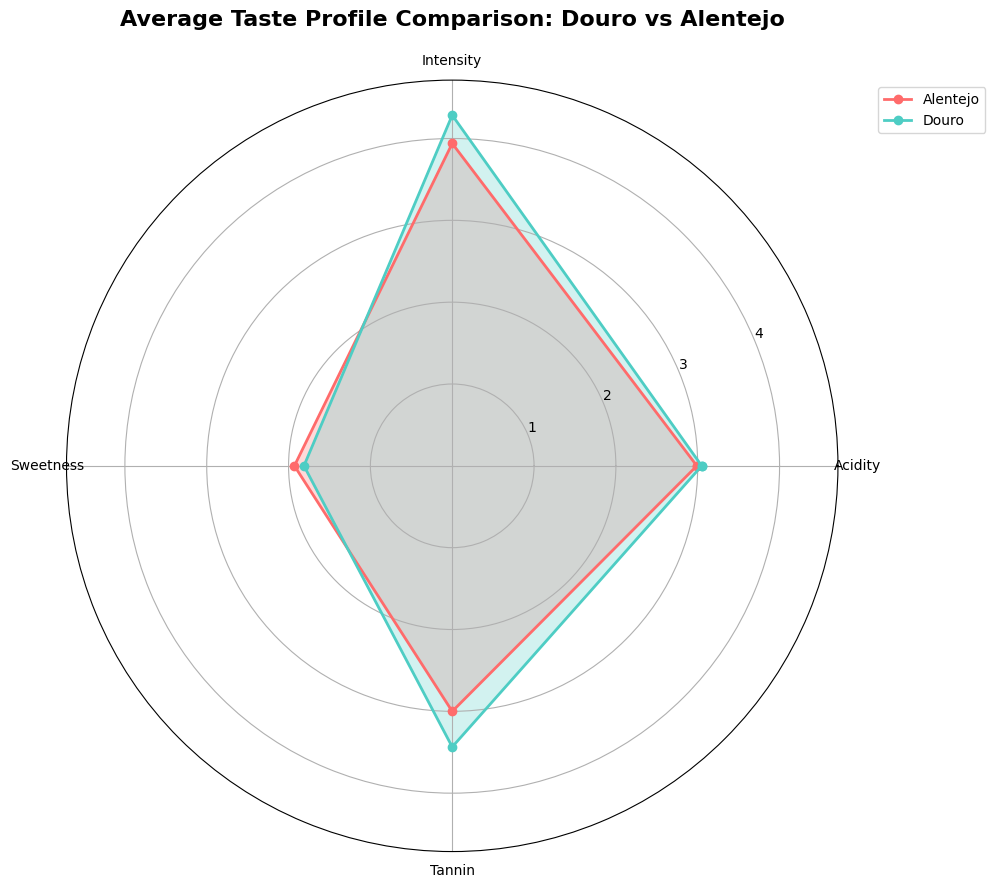

In [27]:
# 2. RADAR CHART - Show average taste profile comparison between regions
from math import pi

# Calculate mean values for each attribute by region
region_profiles = top_50_with_taste.groupby('region_name')[taste_attributes].mean()

# Set up the radar chart
angles = [n / float(len(taste_attributes)) * 2 * pi for n in range(len(taste_attributes))]
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = ['#FF6B6B', '#4ECDC4']
regions = region_profiles.index.tolist()

for i, region in enumerate(regions):
    values = region_profiles.loc[region].tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=region, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels([attr.capitalize() for attr in taste_attributes])
ax.set_ylim(0, max(region_profiles.max()) * 1.1)
ax.set_title('Average Taste Profile Comparison: Douro vs Alentejo', 
             size=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
ax.grid(True)

plt.tight_layout()
plt.show()

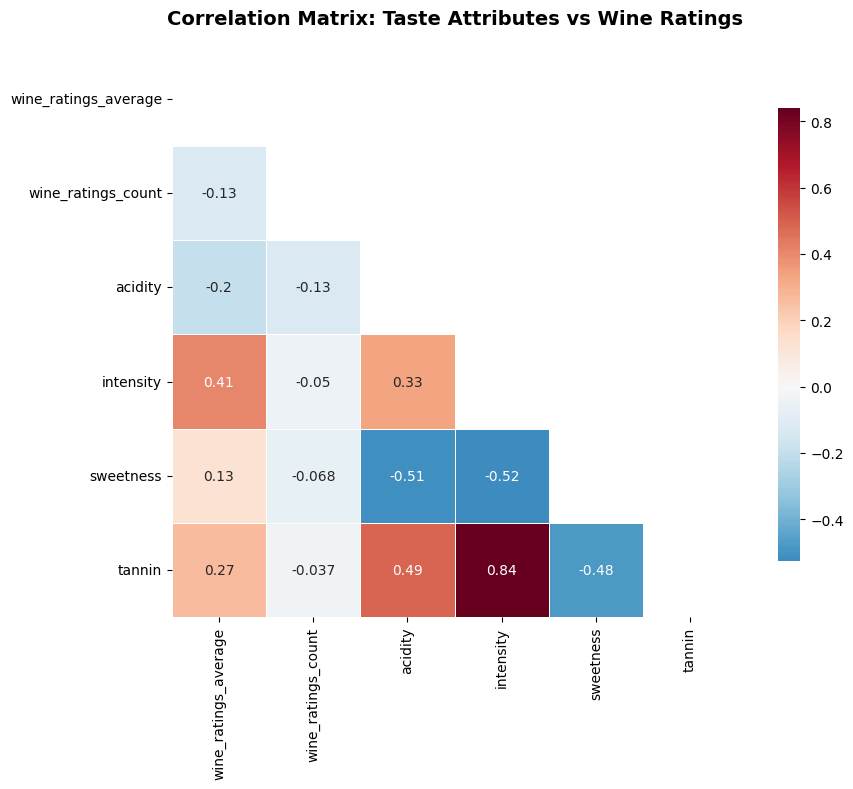

In [28]:
# 3. HEATMAP - Correlation between taste attributes and ratings
# Create a dataset with ratings and taste attributes
correlation_data = top_50_with_taste[['wine_ratings_average', 'wine_ratings_count'] + taste_attributes]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Matrix: Taste Attributes vs Wine Ratings', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3668437046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3668437046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3668437046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\pdamas\AppData\Local\Temp\ipykernel_26360\3668437046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

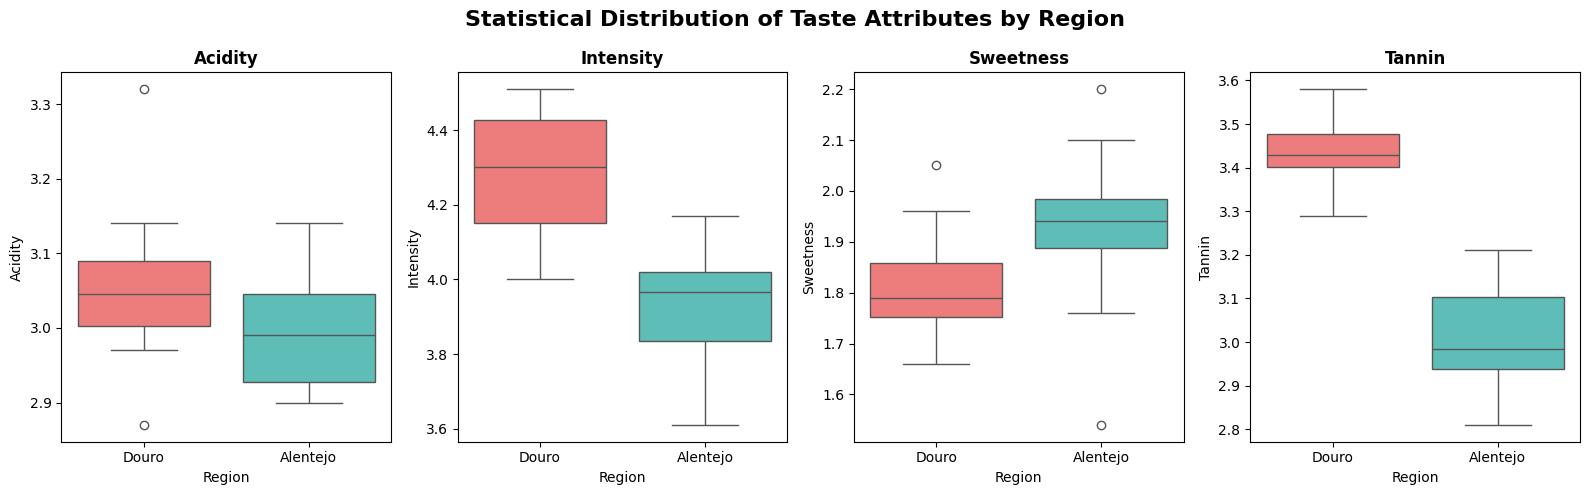

In [29]:
# 4. BOX PLOTS - Show statistical distribution and outliers
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
fig.suptitle('Statistical Distribution of Taste Attributes by Region', fontsize=16, fontweight='bold')

for i, attribute in enumerate(taste_attributes):
    sns.boxplot(
        data=top_50_with_taste,
        x='region_name',
        y=attribute,
        ax=axes[i],
        palette=['#FF6B6B', '#4ECDC4']
    )
    axes[i].set_title(f'{attribute.capitalize()}', fontweight='bold')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel(attribute.capitalize())

plt.tight_layout()
plt.show()